# INFOTECH ACADEMY MACHINE LEARNING-1 HOMEWORK

In [405]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats, norm
from sklearn.model_selection import train_test_split
import mplcyberpunk
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve, RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import log_loss, accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics

import statsmodels.api as sm

import pylab

#from sklearn.preprocessing import Imputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import log_loss, fbeta_score, make_scorer, confusion_matrix, roc_curve
from sklearn.calibration import CalibratedClassifierCV
import scipy
from scipy import stats

from tqdm import tqdm

from sklearn.cluster import KMeans

plt.style.use("cyberpunk")

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
    
    

### Load Dataset

In [342]:
df_titanic = pd.read_csv('titanic_dataset.csv')
df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,Transported,Deck,Cabin_num,Side,Spent
0,1,0,2,39,0,False,1,0,0,0
1,0,0,2,24,0,True,5,0,1,736
2,1,0,2,58,0,False,0,0,1,1470
3,1,0,2,33,0,False,0,0,1,5176
4,0,0,2,16,0,True,5,1,1,1091


In [343]:
df=df_titanic.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12970 entries, 0 to 12969
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    12970 non-null  int64  
 1   PassengerId   12970 non-null  object 
 2   HomePlanet    12682 non-null  object 
 3   CryoSleep     12660 non-null  object 
 4   Cabin         12671 non-null  object 
 5   Destination   12696 non-null  object 
 6   Age           12700 non-null  float64
 7   VIP           12674 non-null  object 
 8   RoomService   12707 non-null  float64
 9   FoodCourt     12681 non-null  float64
 10  ShoppingMall  12664 non-null  float64
 11  Spa           12686 non-null  float64
 12  VRDeck        12702 non-null  float64
 13  Name          12676 non-null  object 
 14  Transported   12970 non-null  bool   
dtypes: bool(1), float64(6), int64(1), object(7)
memory usage: 1.4+ MB


In [344]:
df.shape

(12970, 15)

In [345]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,12970.0,3617.887741,2408.607419,0.0,1621.0,3242.0,5449.75,8692.0
Age,12700.0,28.771969,14.387261,0.0,19.0,27.0,38.00,79.0
RoomService,12707.0,222.897852,647.596664,0.0,0.0,0.0,49.00,14327.0
FoodCourt,12681.0,451.961675,1584.370747,0.0,0.0,0.0,77.00,29813.0
ShoppingMall,12664.0,174.906033,590.558690,0.0,0.0,0.0,29.00,23492.0
Spa,12686.0,308.476904,1130.279641,0.0,0.0,0.0,57.00,22408.0
VRDeck,12702.0,306.789482,1180.097223,0.0,0.0,0.0,42.00,24133.0


In [346]:
df.nunique()

Unnamed: 0       8693
PassengerId     12970
HomePlanet          3
CryoSleep           2
Cabin            9825
Destination         3
Age                80
VIP                 2
RoomService      1578
FoodCourt        1953
ShoppingMall     1367
Spa              1679
VRDeck           1642
Name            12629
Transported         2
dtype: int64

## Step 1: Define the Problem

Clearly define the problem you want to solve using the Titanic dataset. For example, you could predict whether a passenger survived or not based on various features.

## Step 2: Gather and Explore the Data

Obtain the Titanic dataset from a reliable source, such as Kaggle.
Explore the dataset to understand its structure and variables.
Identify the features that are available and their potential relevance to the problem.

## Step 3: Preprocess the Data

* Handle missing values by imputing or removing them appropriately.
* Detect and handle outliers using techniques such as:
    - **Visualization** : Plot box plots or histograms to identify potential outliers.
    - **Statistical methods**: Calculate z-scores or interquartile ranges to identify and handle outliers.
* Transform categorical variables into numerical representations (e.g., one-hot encoding).
* Normalize or scale numerical features as needed.

In [347]:
df[["Deck", "Cabin_num", "Side"]] = df["Cabin"].str.split("/", expand=True)
df[["Deck", "Cabin_num", "Side"]] = df["Cabin"].str.split("/", expand=True)
df["Spent"] = df["RoomService"] + df["FoodCourt"] + df["ShoppingMall"] + df["Spa"] + df["VRDeck"]
df.head()

,Unnamed: 0,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Cabin_num,Side,Spent
0,0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0,P,0.0
1,1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0,S,736.0
2,2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0,S,10383.0
3,3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0,S,5176.0
4,4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1,S,1091.0


In [348]:
df=df.drop(['Cabin','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','Name','PassengerId'],axis=1)
df.tail()

,Unnamed: 0,HomePlanet,CryoSleep,Destination,Age,VIP,Transported,Deck,Cabin_num,Side,Spent
12965,4272,Earth,True,TRAPPIST-1e,34.0,False,False,G,1496,S,0.0
12966,4273,Earth,False,TRAPPIST-1e,42.0,False,False,NaN,NaN,NaN,1018.0
12967,4274,Mars,True,55 Cancri e,NaN,False,False,D,296,P,0.0
12968,4275,Europa,False,NaN,NaN,False,False,D,297,P,3203.0
12969,4276,Earth,True,PSO J318.5-22,43.0,False,False,G,1498,S,0.0


In [349]:
duplicates = df.duplicated(keep=False)
print(df[duplicates])

Empty DataFrame
Columns: [Unnamed: 0, HomePlanet, CryoSleep, Destination, Age, VIP, Transported, Deck, Cabin_num, Side, Spent]
Index: []


In [350]:
encoder = OrdinalEncoder()
df['HomePlanet'] = encoder.fit_transform(df['HomePlanet'].to_numpy().reshape(-1,1))
HomePlanet_ctg = encoder.categories_
df['CryoSleep'] = encoder.fit_transform(df['CryoSleep'].to_numpy().reshape(-1,1))
CryoSleep_ctg = encoder.categories_
df['Destination'] = encoder.fit_transform(df['Destination'].to_numpy().reshape(-1,1))
Destination_ctg = encoder.categories_
df['VIP'] = encoder.fit_transform(df['VIP'].to_numpy().reshape(-1,1))
VIP_ctg = encoder.categories_
df['Deck'] = encoder.fit_transform(df['Deck'].to_numpy().reshape(-1,1))
Deck_ctg = encoder.categories_
df['Side'] = encoder.fit_transform(df['Side'].to_numpy().reshape(-1,1))
Side_ctg = encoder.categories_

In [351]:

df.head()

,Unnamed: 0,HomePlanet,CryoSleep,Destination,Age,VIP,Transported,Deck,Cabin_num,Side,Spent
0,0,1.0,0.0,2.0,39.0,0.0,False,1.0,0,0.0,0.0
1,1,0.0,0.0,2.0,24.0,0.0,True,5.0,0,1.0,736.0
2,2,1.0,0.0,2.0,58.0,1.0,False,0.0,0,1.0,10383.0
3,3,1.0,0.0,2.0,33.0,0.0,False,0.0,0,1.0,5176.0
4,4,0.0,0.0,2.0,16.0,0.0,True,5.0,1,1.0,1091.0


In [352]:
imputer = SimpleImputer(strategy='most_frequent')
df['HomePlanet'] = imputer.fit_transform(df['HomePlanet'].to_numpy().reshape(-1,1))
df['CryoSleep'] = imputer.fit_transform(df['CryoSleep'].to_numpy().reshape(-1,1))
df['Destination'] = imputer.fit_transform(df['Destination'].to_numpy().reshape(-1,1))
df['VIP'] = imputer.fit_transform(df['VIP'].to_numpy().reshape(-1,1))
df['Deck'] = imputer.fit_transform(df['Deck'].to_numpy().reshape(-1,1))

df['Side'] = imputer.fit_transform(df['Side'].to_numpy().reshape(-1,1))


In [353]:
imputer = SimpleImputer(strategy='mean')
df['Age'] = imputer.fit_transform(df['Age'].to_numpy().reshape(-1,1))
df['Spent'] = imputer.fit_transform(df['Spent'].to_numpy().reshape(-1,1))
df['Cabin_num'] = imputer.fit_transform(df['Cabin_num'].to_numpy().reshape(-1,1))

In [354]:
df=df.drop(['Unnamed: 0'], axis = 1)

In [355]:
df.isnull().sum()

HomePlanet     0
CryoSleep      0
Destination    0
Age            0
VIP            0
Transported    0
Deck           0
Cabin_num      0
Side           0
Spent          0
dtype: int64

<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


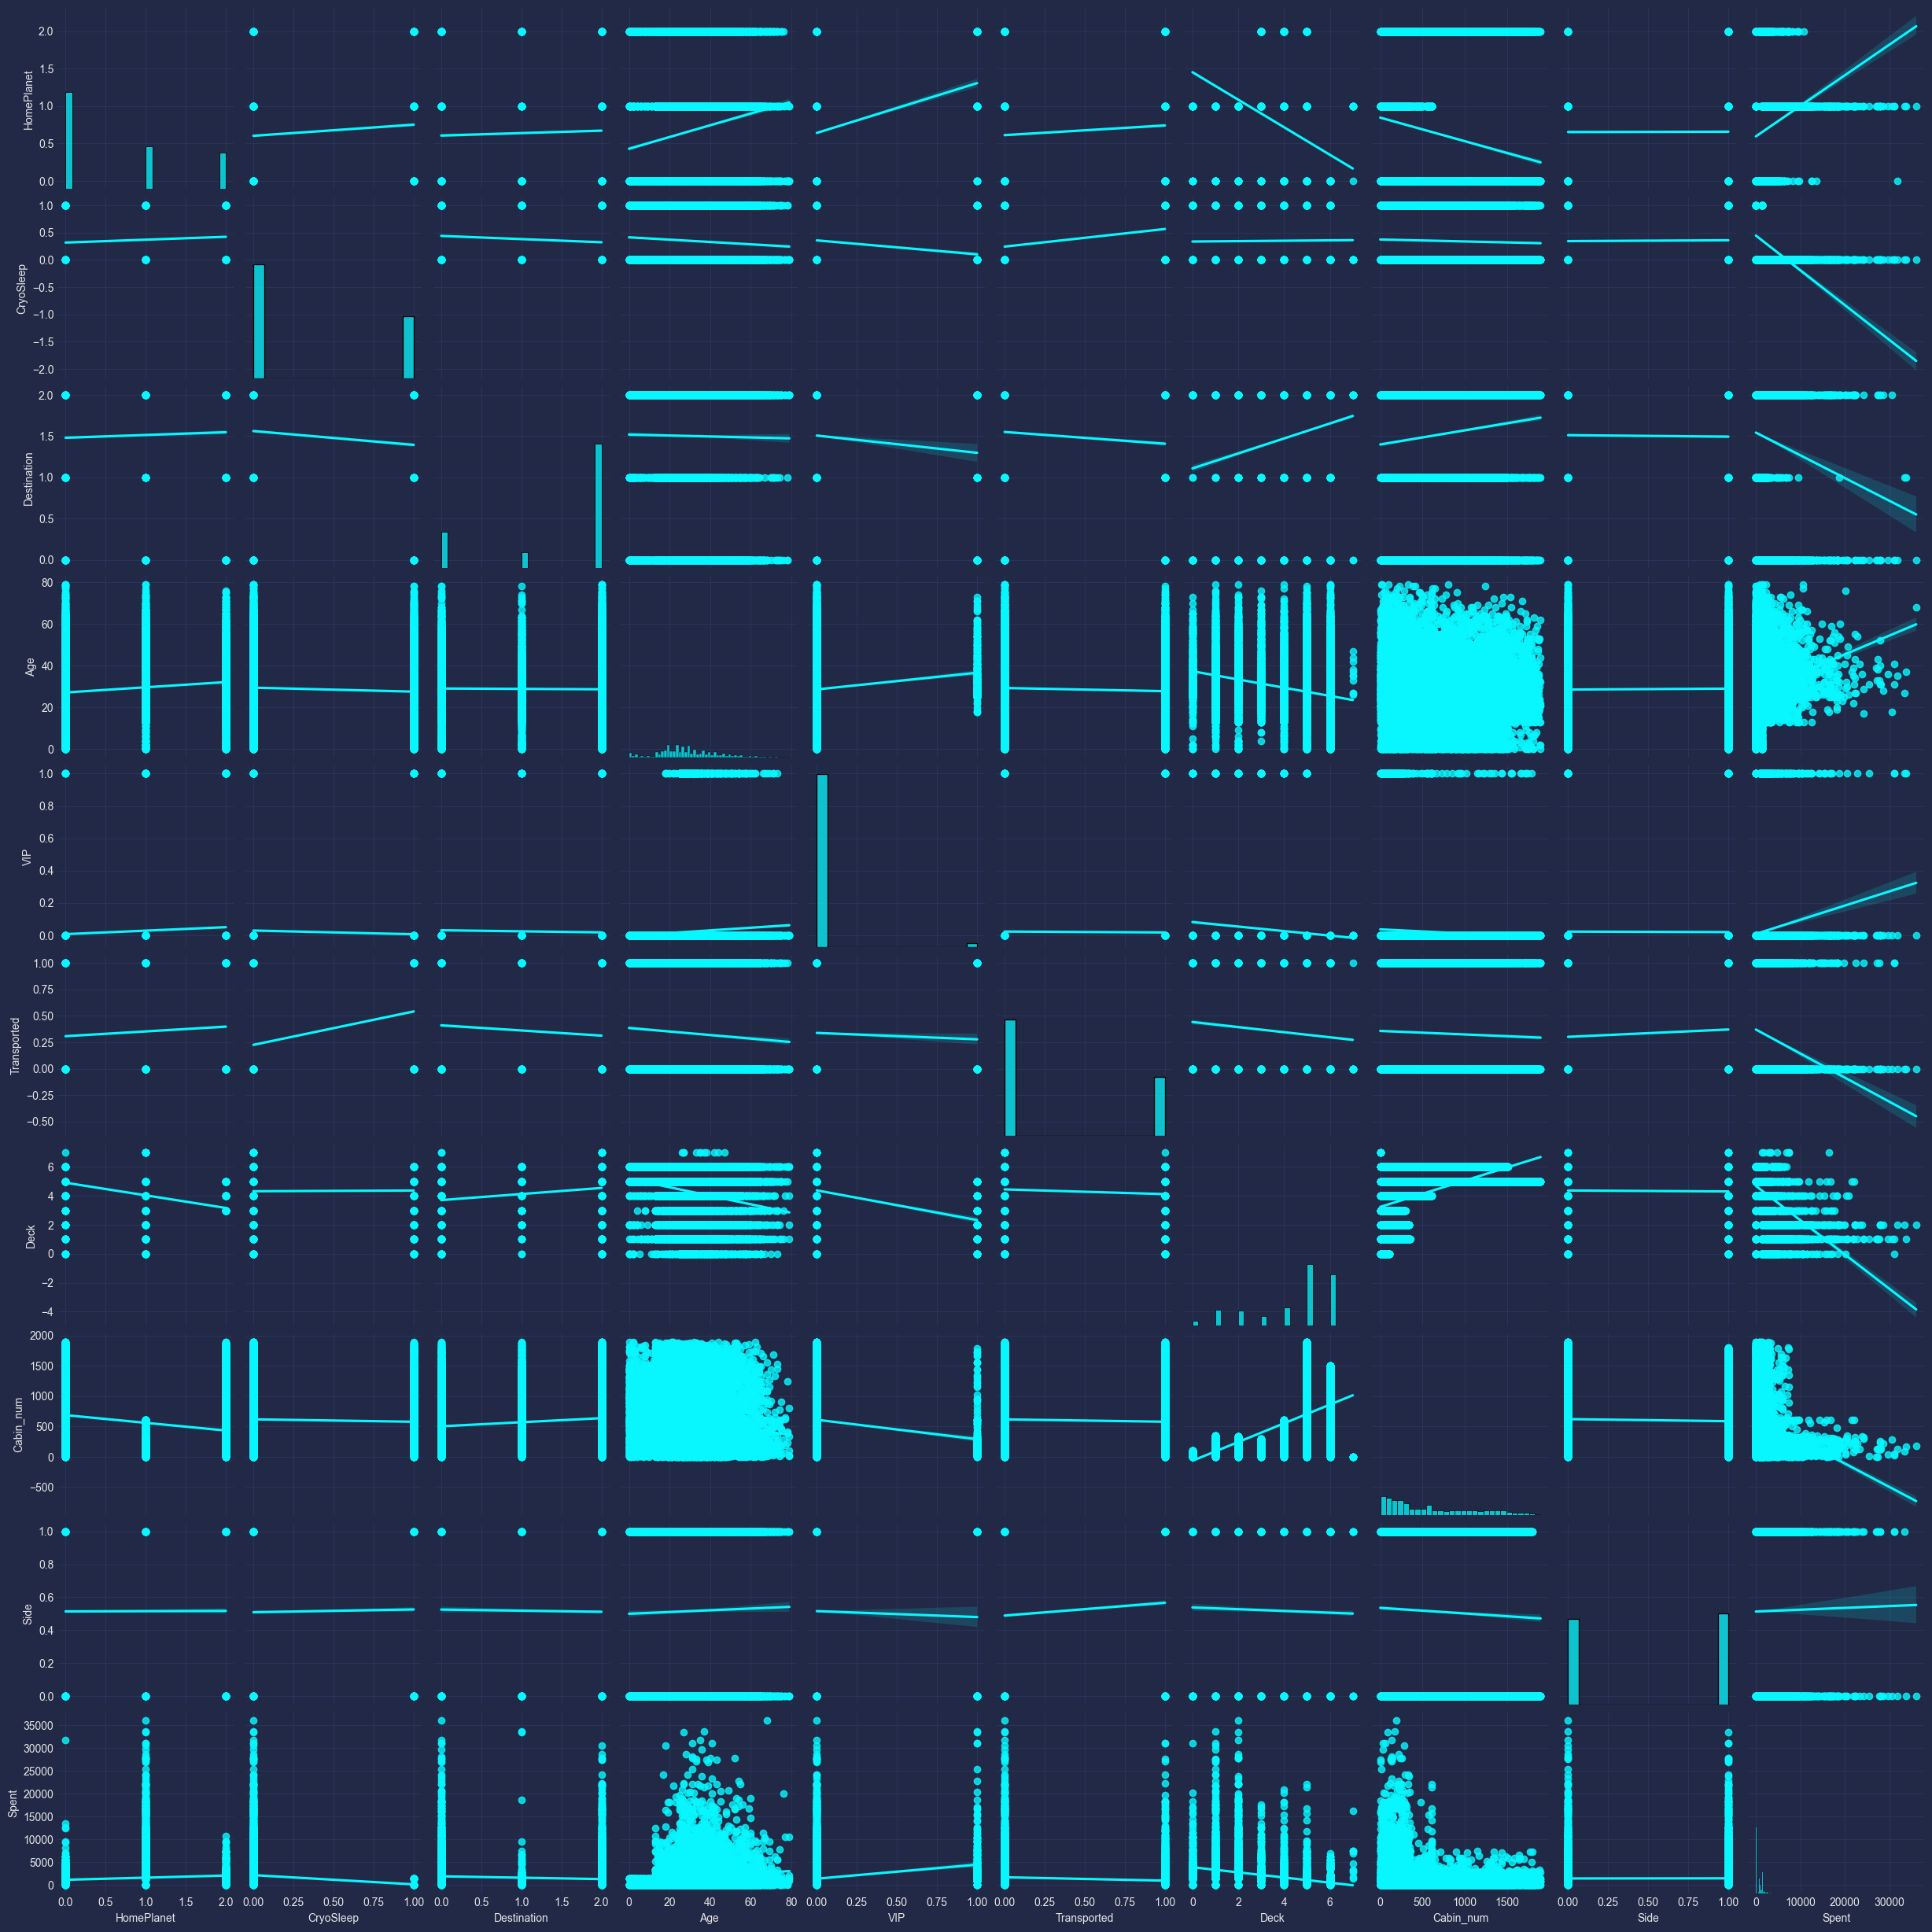

In [356]:
import seaborn as sns
sns.pairplot(df, kind  ="reg");

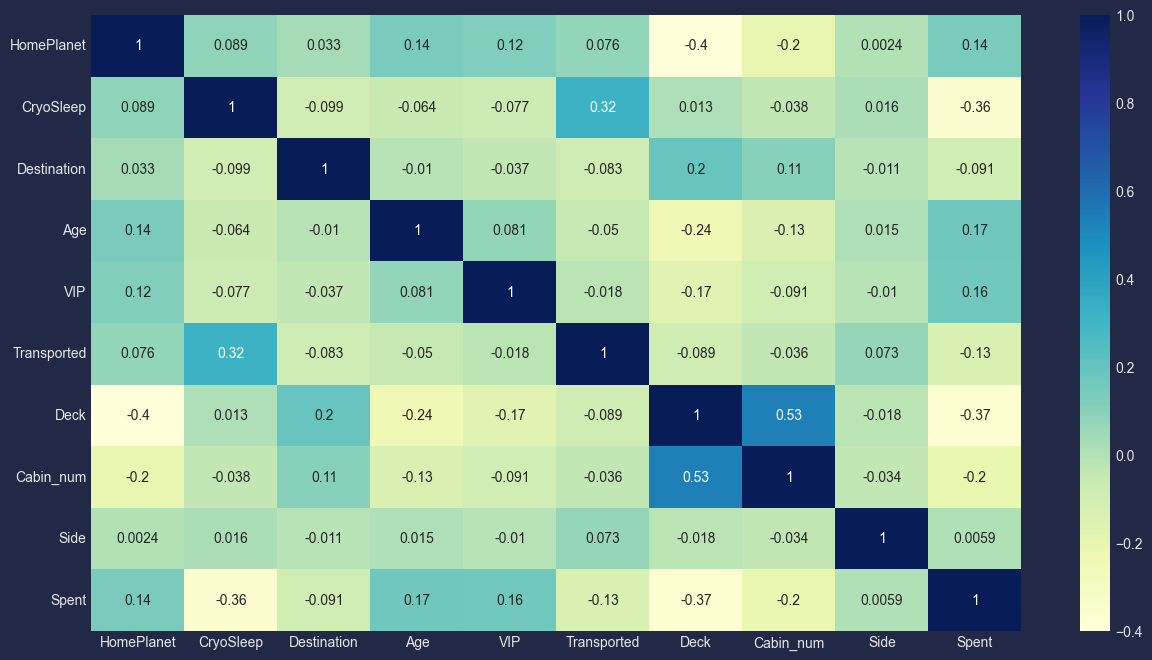

In [357]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [358]:
target_correlation = df.corr()['Transported'].abs().sort_values(ascending=False)
target_correlation

Transported    1.000000
CryoSleep      0.319534
Spent          0.129517
Deck           0.088749
Destination    0.083346
HomePlanet     0.076344
Side           0.073463
Age            0.050247
Cabin_num      0.035980
VIP            0.018345
Name: Transported, dtype: float64

array([[<Axes: title={'center': 'HomePlanet'}>,
        <Axes: title={'center': 'CryoSleep'}>,
        <Axes: title={'center': 'Destination'}>],
       [<Axes: title={'center': 'Age'}>, <Axes: title={'center': 'VIP'}>,
        <Axes: title={'center': 'Deck'}>],
       [<Axes: title={'center': 'Cabin_num'}>,
        <Axes: title={'center': 'Side'}>,
        <Axes: title={'center': 'Spent'}>]], dtype=object)

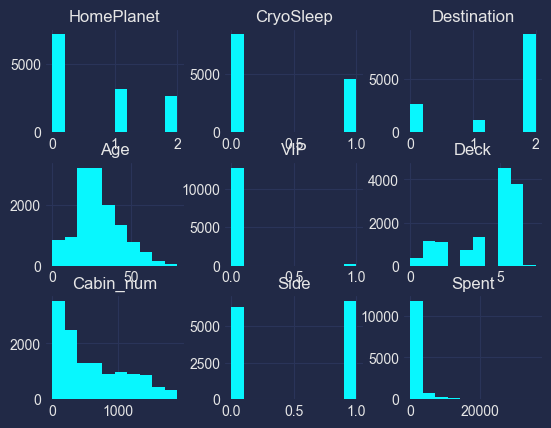

In [359]:
df.hist()

<Axes: >

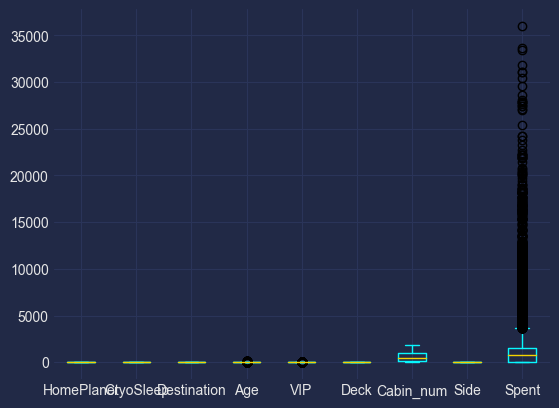

In [360]:
df.plot(kind = 'box')

In [361]:
from scipy.stats import norm
from statsmodels.stats.diagnostic import lilliefors
my_data = norm.rvs(size=500)
lilliefors(my_data)

(0.027917389504187762, 0.5221710273949132)

In [362]:
from scipy.stats import kstest, norm
my_data = norm.rvs(size=1000)
ks_statistic, p_value = kstest(my_data, 'norm')
print(ks_statistic, p_value)

0.027339305405589764 0.4357964481781762


F1 Score = 2 * (Precision * Recall) / (Precision + Recall)

In [363]:
from sklearn.metrics import f1_score
#define array of actual classes
actual = np.repeat([1, 0], repeats=[160, 240])

#define array of predicted classes
pred = np.repeat([1, 0, 1, 0], repeats=[120, 40, 70, 170])

#calculate F1 score
f1_score(actual, pred)

0.6857142857142857

<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


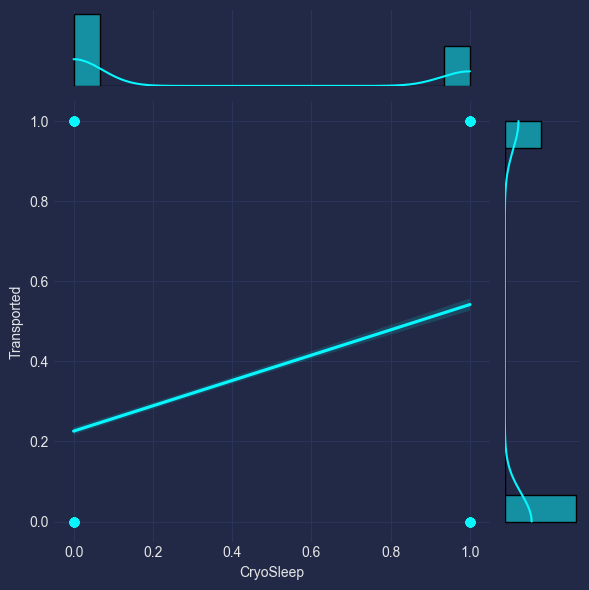

In [364]:
sns.jointplot(x = "CryoSleep", y = "Transported", data = df, kind = "reg")

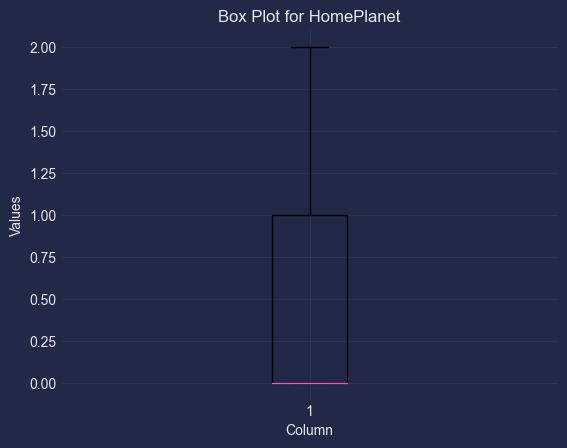

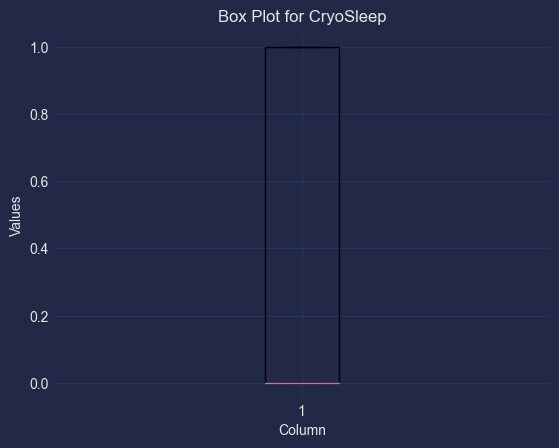

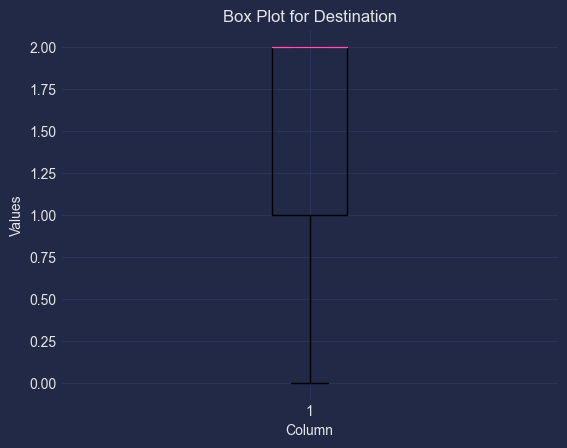

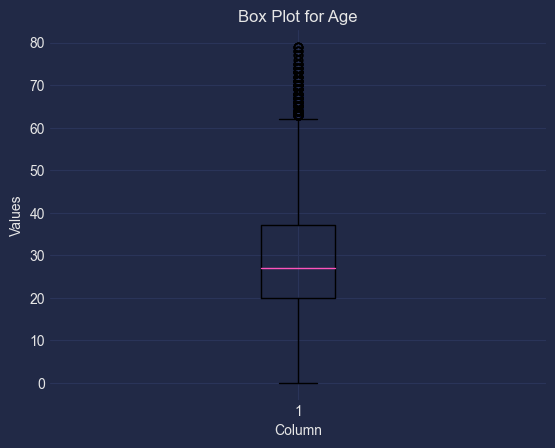

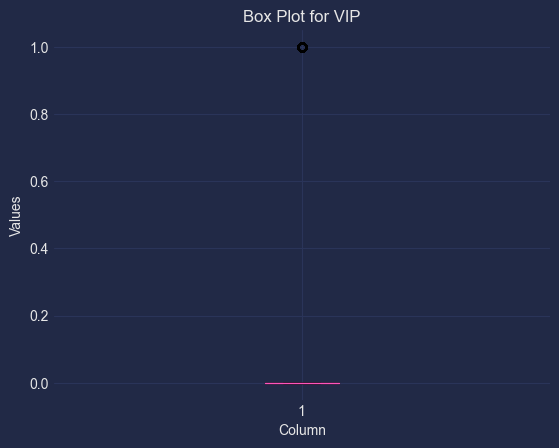

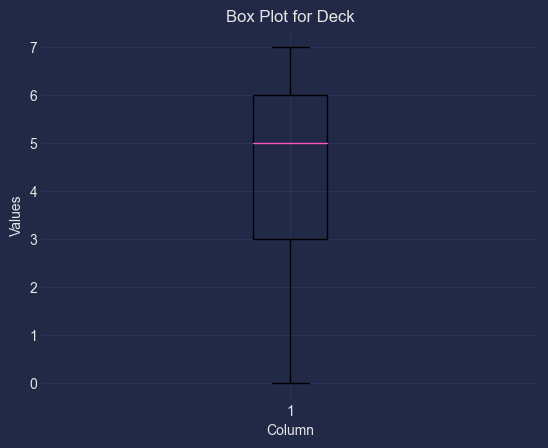

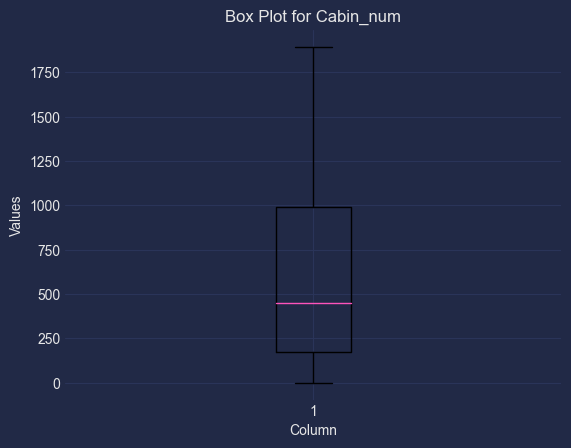

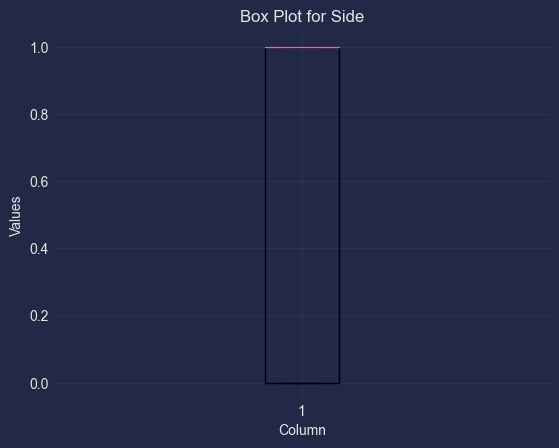

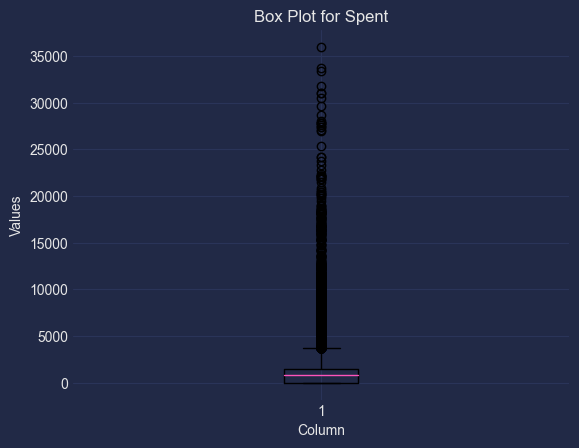

In [365]:
import matplotlib.pyplot as plt
# Create box plots for each numeric column
for column in numeric_columns:
    plt.figure()
    plt.boxplot(df[column])
    plt.title(f"Box Plot for {column}")
    plt.xlabel("Column")
    plt.ylabel("Values")
    plt.show()

In [366]:
df2 = df.copy()

In [367]:
numeric_columns=df2.select_dtypes(include=np.number)

In [368]:
df2.dtypes

HomePlanet     float64
CryoSleep      float64
Destination    float64
Age            float64
VIP            float64
Transported       bool
Deck           float64
Cabin_num      float64
Side           float64
Spent          float64
dtype: object

In [369]:
z_scores = pd.DataFrame()
for column in numeric_columns:
    z_score = (df2[column] - df2[column].mean()) / df2[column].std()
    z_scores[column] = z_score

# Set the threshold for identifying outliers
z_score_threshold = 3

# Replace the outliers with the mean value of each column
for column in numeric_columns:
    df2[column] = np.where(z_scores[column].abs() > z_score_threshold, df2[column].mean(), df2[column])

z_scores

,HomePlanet,CryoSleep,Destination,Age,VIP,Deck,Cabin_num,Side,Spent
0,0.430784,-0.738939,0.614915,7.184266e-01,-0.146627,-1.915712,-1.190665e+00,-1.030496,-0.547383
1,-0.819444,-0.738939,0.614915,-3.351876e-01,-0.146627,0.380664,-1.190665e+00,0.970332,-0.273408
2,0.430784,-0.738939,0.614915,2.053005e+00,6.819499,-2.489806,-1.190665e+00,0.970332,3.317670
3,0.430784,-0.738939,0.614915,2.969809e-01,-0.146627,-2.489806,-1.190665e+00,0.970332,1.379374
4,-0.819444,-0.738939,0.614915,-8.971152e-01,-0.146627,0.380664,-1.188693e+00,0.970332,-0.141260
...,...,...,...,...,...,...,...,...,...
12965,-0.819444,1.353188,0.614915,3.672219e-01,-0.146627,0.954758,1.760345e+00,0.970332,-0.547383
12966,-0.819444,-0.738939,0.614915,9.291495e-01,-0.146627,0.380664,-2.242587e-16,0.970332,-0.168434
12967,1.681011,1.353188,-1.851973,-2.495460e-16,-0.146627,-0.767524,-6.067756e-01,-1.030496,-0.547383
12968,0.430784,-0.738939,0.614915,-2.495460e-16,-0.146627,-0.767524,-6.048030e-01,-1.030496,0.644928


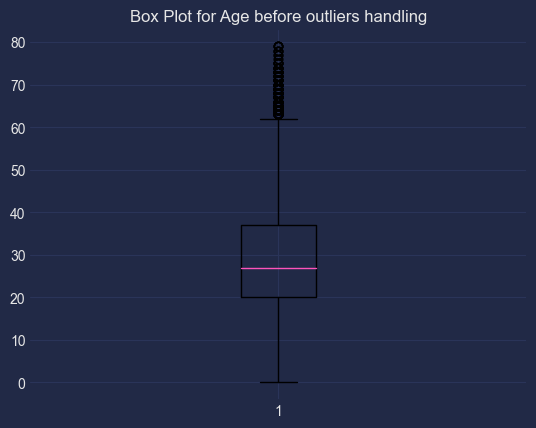

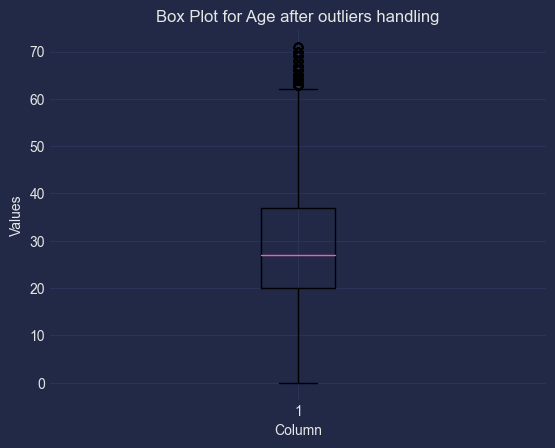

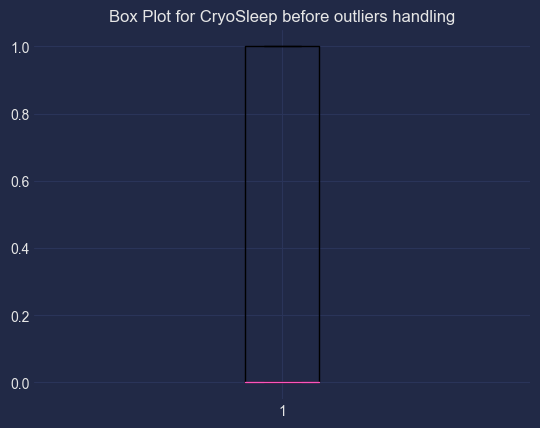

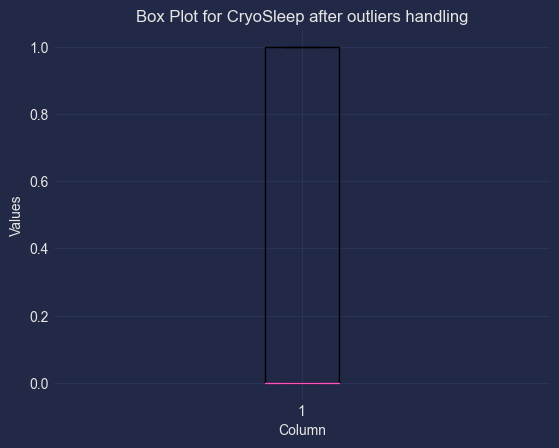

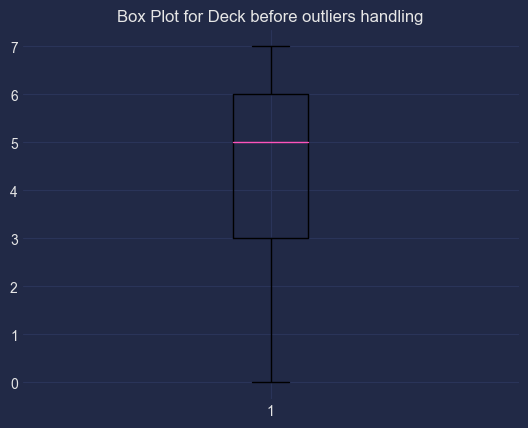

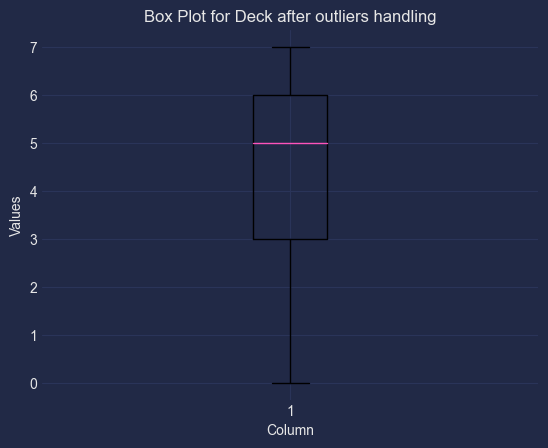

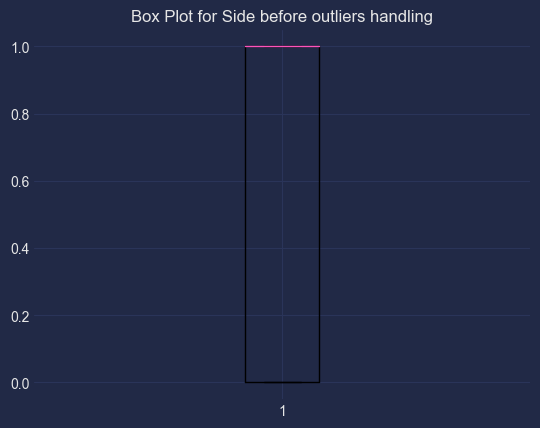

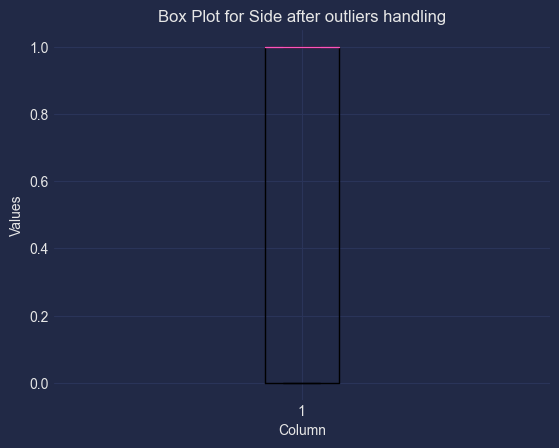

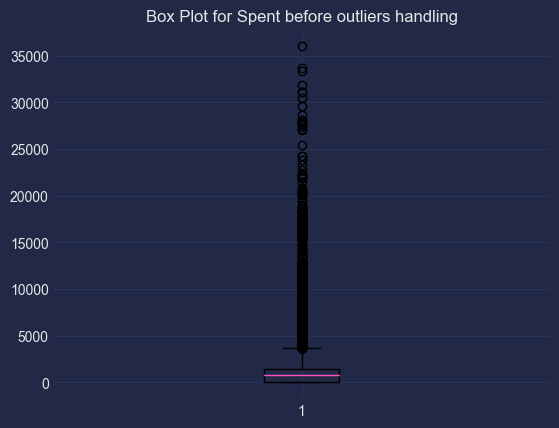

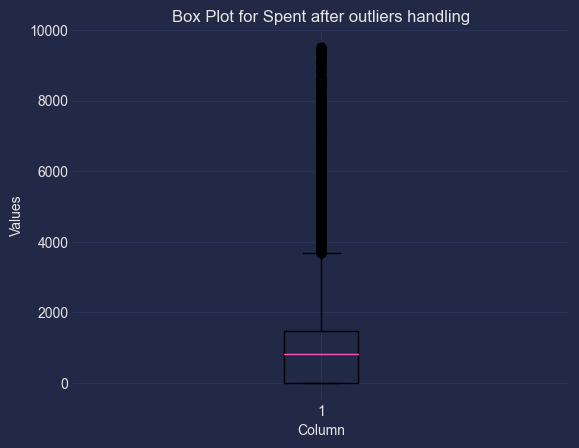

In [370]:
# Create box plots for each numeric column
for column in ['Age', 'CryoSleep', 'Deck', 'Side' ,'Spent']:
    plt.figure()
    plt.boxplot(df[column])
    plt.title(f"Box Plot for {column} before outliers handling")
    plt.show()
    plt.boxplot(df2[column])
    plt.title(f"Box Plot for {column} after outliers handling")
    plt.xlabel("Column")
    plt.ylabel("Values")
    plt.show()

## Step 4: Check for Normality

Perform a normality check on the numerical features to assess if they follow a Gaussian distribution.
Use techniques like histograms, Q-Q plots, or statistical tests (e.g., Shapiro-Wilk test) to check for normality.

If the data is not normally distributed, consider applying appropriate transformations.

In [371]:
# Perform normality tests for each numeric column
for column in numeric_columns:
    data = df2[column].dropna()

    # Shapiro-Wilk test
    shapiro_stat, shapiro_pvalue = stats.shapiro(data)
    shapiro_normal = shapiro_pvalue > 0.05

    # Anderson-Darling test
    anderson_stat, anderson_crit, anderson_sign = stats.anderson(data)
    anderson_normal = anderson_stat < anderson_crit[anderson_sign == 15][0]

    # D'Agostino's K^2 test
    dagostino_stat, dagostino_pvalue = stats.normaltest(data)
    dagostino_normal = dagostino_pvalue > 0.05

    # Jarque-Bera test
    jarquebera_stat, jarquebera_pvalue = stats.jarque_bera(data)
    jarquebera_normal = jarquebera_pvalue > 0.05

    print(f"Column: {column}")
    print(f"Shapiro-Wilk test - Normal: {shapiro_normal}")
    print(f"Anderson-Darling test - Normal: {anderson_normal}")
    print(f"D'Agostino's K^2 test - Normal: {dagostino_normal}")
    print(f"Jarque-Bera test - Normal: {jarquebera_normal}")
    print()

c:\Users\karakurt\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Column: HomePlanet
Shapiro-Wilk test - Normal: False
Anderson-Darling test - Normal: False
D'Agostino's K^2 test - Normal: False
Jarque-Bera test - Normal: False

Column: CryoSleep
Shapiro-Wilk test - Normal: False
Anderson-Darling test - Normal: False
D'Agostino's K^2 test - Normal: False
Jarque-Bera test - Normal: False

Column: Destination
Shapiro-Wilk test - Normal: False
Anderson-Darling test - Normal: False
D'Agostino's K^2 test - Normal: False
Jarque-Bera test - Normal: False

Column: Age
Shapiro-Wilk test - Normal: False
Anderson-Darling test - Normal: False
D'Agostino's K^2 test - Normal: False
Jarque-Bera test - Normal: False

Column: VIP
Shapiro-Wilk test - Normal: False
Anderson-Darling test - Normal: False
D'Agostino's K^2 test - Normal: False
Jarque-Bera test - Normal: False

Column: Deck
Shapiro-Wilk test - Normal: False
Anderson-Darling test - Normal: False
D'Agostino's K^2 test - Normal: False
Jarque-Bera test - Normal: False

Column: Cabin_num
Shapiro-Wilk test - Norm

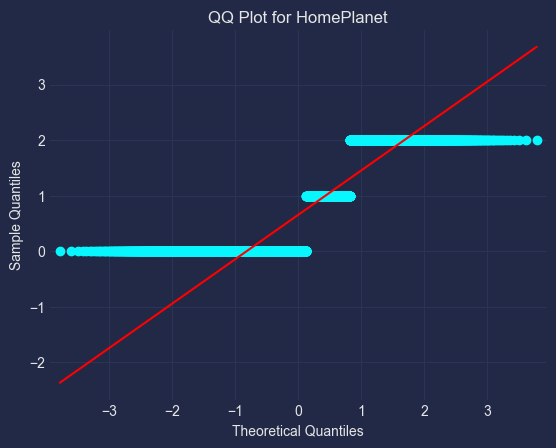

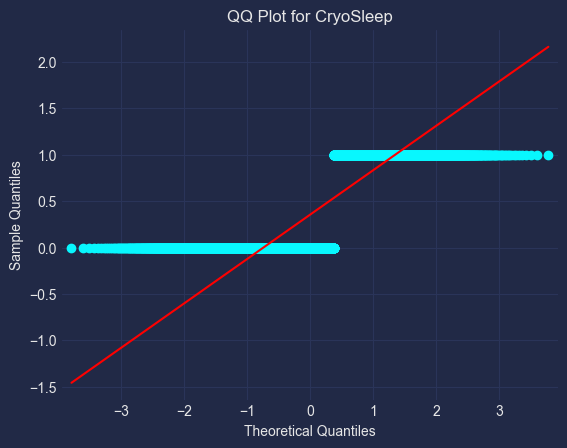

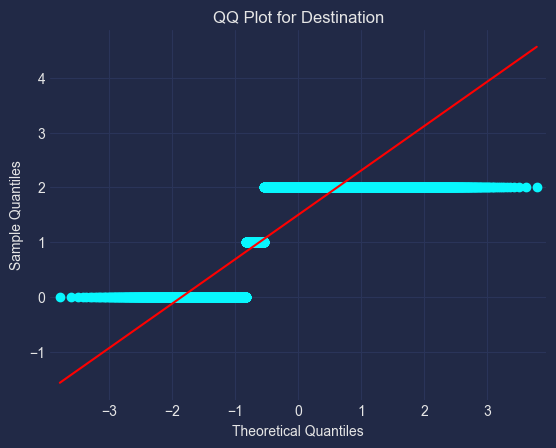

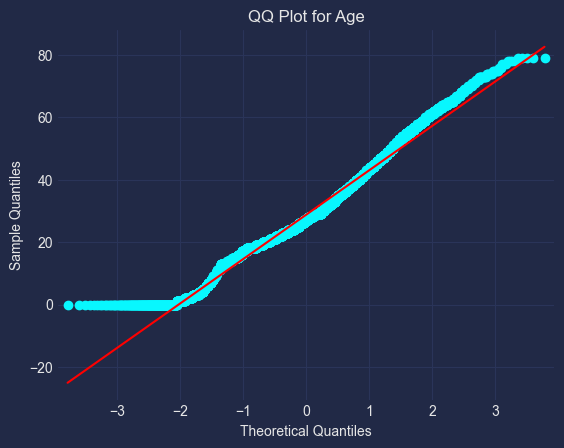

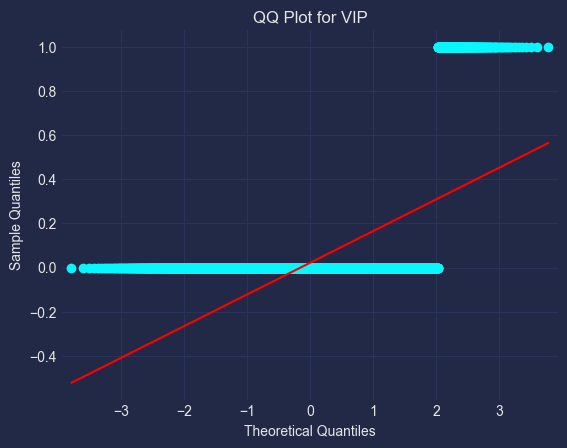

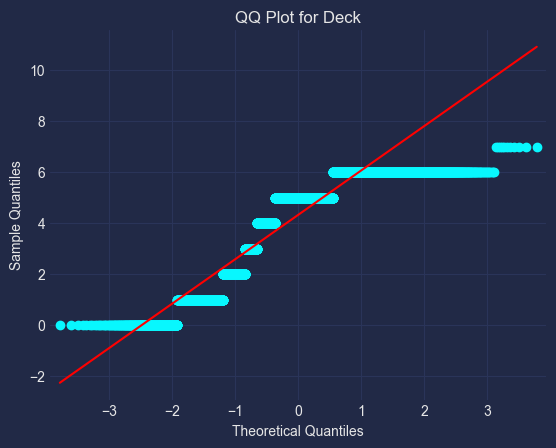

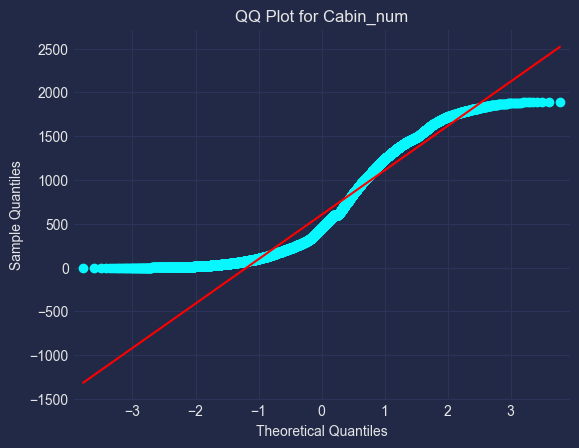

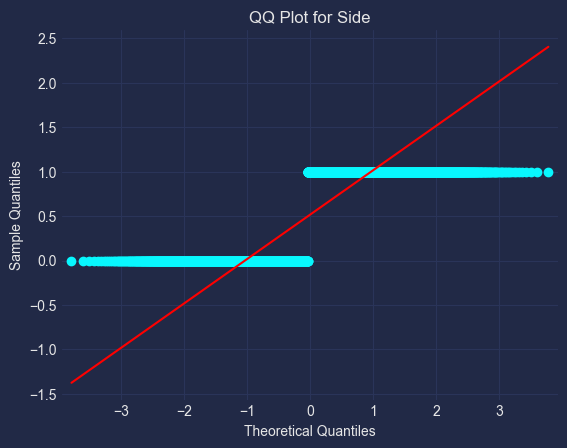

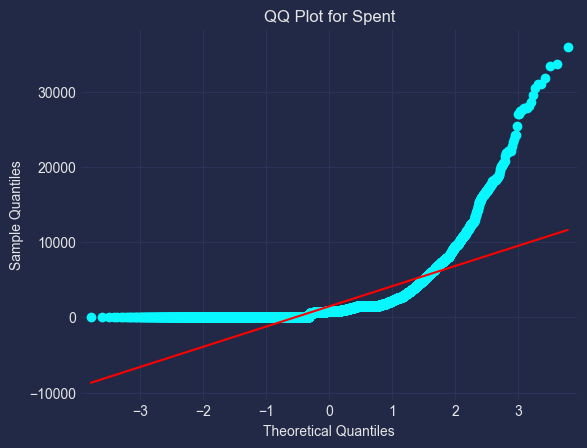

In [372]:
import statsmodels.api as sm
# Perform normality check using QQ plot
for column in numeric_columns:
    # Create QQ plot
    sm.qqplot(df[column], line='s')
    plt.title(f"QQ Plot for {column}")
    plt.show()

In [373]:
def transformation_numerical(col): 
    # Select only the numeric columns
    numeric_data = df2 [numeric_columns]
    # Perform logarithmic transformation on each numeric column
    log_transformed_df = np.log1p(numeric_data)
    sqrt_transformed_df = np.sqrt(numeric_data)
    power_transformed_df = np.power(numeric_data, 2)
    reciprocal_transformed_df = 1 / (numeric_data + 1)

    # Plot the original and transformed data for a single column
    column = col
    plt.figure(figsize=(10, 5))
    plt.subplot(2, 2, 1)
    plt.hist(numeric_data[column], bins=20)
    plt.title(f'{column} in Original Data')
    plt.subplot(2, 2, 2)
    plt.hist(log_transformed_df[column], bins=20)
    plt.title(f'{column} in Logarithmic Transformation')
    plt.subplot(2, 2, 3)
    plt.hist(sqrt_transformed_df[column], bins=20)
    plt.title(f'{column} in Square Root Transformation')
    plt.subplot(2, 2, 4)
    plt.hist(power_transformed_df[column], bins=20)
    plt.title(f'{column} in Power Transformation')
    plt.tight_layout()
    plt.show()


In [ ]:
transformation_numerical('Spent')

In [389]:
def normality_b_a_transformed(col):
    column = col
    numeric_data = df2 [numeric_columns]
    log_transformed_df = np.log1p(numeric_data)
    sqrt_transformed_df = np.sqrt(numeric_data)
    power_transformed_df = np.power(numeric_data, 2)
    reciprocal_transformed_df = 1 / (numeric_data + 1)
    
    sm.qqplot(numeric_data[column], line='s')
    plt.title(f"QQ Plot for {column} in Original Data")
    plt.show()
    sm.qqplot(log_transformed_df[column], line='s')
    plt.title(f"QQ Plot for {column} in Logarithmic Transformed Data")
    plt.show()
    sm.qqplot(sqrt_transformed_df[column], line='s')
    plt.title(f"QQ Plot for {column} in Square Root Transformed Data")
    plt.show()
    sm.qqplot(power_transformed_df[column], line='s')
    plt.title(f"QQ Plot for {column} in Power Transformed Data")
    plt.show()

In [390]:
normality_b_a_transformed('Transported')

ValueError: Boolean array expected for the condition, not float64

## Step 5: Apply Transformations

Apply transformations to the data if required, based on the normality check results.

Common transformations include:

* Logarithmic transformation: Use when data is positively skewed.
* Square root transformation: Use when data has a moderate positive skew.
* Power transformation: Use when data has a severe positive or negative skew.

Apply the chosen transformation(s) to the appropriate features.

In [385]:
df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,Transported,Deck,Cabin_num,Side,Spent
0,1.0,0.0,2.0,39.0,0.0,False,1.0,0.0,0.0,0.0
1,0.0,0.0,2.0,24.0,0.0,True,5.0,0.0,1.0,736.0
2,1.0,0.0,2.0,58.0,1.0,False,0.0,0.0,1.0,10383.0
3,1.0,0.0,2.0,33.0,0.0,False,0.0,0.0,1.0,5176.0
4,0.0,0.0,2.0,16.0,0.0,True,5.0,1.0,1.0,1091.0


In [376]:
numeric_columns

,HomePlanet,CryoSleep,Destination,Age,VIP,Deck,Cabin_num,Side,Spent
0,1.0,0.0,2.0,39.000000,0.0,1.0,0.000000,0.0,0.0
1,0.0,0.0,2.0,24.000000,0.0,5.0,0.000000,1.0,736.0
2,1.0,0.0,2.0,58.000000,1.0,0.0,0.000000,1.0,10383.0
3,1.0,0.0,2.0,33.000000,0.0,0.0,0.000000,1.0,5176.0
4,0.0,0.0,2.0,16.000000,0.0,5.0,1.000000,1.0,1091.0
...,...,...,...,...,...,...,...,...,...
12965,0.0,1.0,2.0,34.000000,0.0,6.0,1496.000000,1.0,0.0
12966,0.0,0.0,2.0,42.000000,0.0,5.0,603.601926,1.0,1018.0
12967,2.0,1.0,0.0,28.771969,0.0,3.0,296.000000,0.0,0.0
12968,1.0,0.0,2.0,28.771969,0.0,3.0,297.000000,0.0,3203.0


In [396]:
df3 = df2.copy()
numeric_data = df2 [numeric_columns]
log_transformed_df = np.log1p(numeric_data)
sqrt_transformed_df = np.sqrt(numeric_data)
    
df3["CryoSleep"] = log_transformed_df["CryoSleep"] 
df3["Transported"] = sqrt_transformed_df["Transported"] 

ValueError: Boolean array expected for the condition, not float64

In [397]:
features = ['Age','CryoSleep','Cabin_num']

# Perform min-max scaling
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df3[features])

# Create a new DataFrame with scaled features
data_scaled = pd.DataFrame(data_scaled, columns=features)
data_scaled.head()

,Age,CryoSleep,Cabin_num
0,0.549296,0.0,0.000000
1,0.338028,0.0,0.000000
2,0.816901,0.0,0.000000
3,0.464789,0.0,0.000000
4,0.225352,0.0,0.000528


## Step 6: Split the Data

Split the preprocessed and transformed data into training and testing sets.
Typically, use around 70-80% of the data for training and the remaining for testing.

In [401]:
Y_full = df.pop('Transported')
X_full = df

In [402]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_full)

In [403]:
X_train, X_val, y_train, y_val = train_test_split(X_scaled, Y_full, test_size=0.2)

In [406]:
X = data_scaled[["Age"]]
y = df3["Transported"]
reg = LinearRegression()
model = reg.fit(X, y)

In [407]:
X

,Age
0,0.549296
1,0.338028
2,0.816901
3,0.464789
4,0.225352
...,...
12965,0.478873
12966,0.591549
12967,0.405239
12968,0.405239


In [408]:
y

0        False
1         True
2        False
3        False
4         True
         ...  
12965    False
12966    False
12967    False
12968    False
12969    False
Name: Transported, Length: 12970, dtype: bool

## Step 7: Select a Suitable Algorithm

Determine the appropriate algorithm(s) for this binary classification problem.
Consider algorithms like **Logistic Regression, Decision Trees, Random Forests, or Support Vector Machines.**
Choose an algorithm that suits the problem requirements and constraints.

In [ ]:
from sklearn.neural_network import MLPClassifier

from xgboost import XGBClassifier

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis


from sklearn.svm import SVC, LinearSVC, NuSVC

In [ ]:
models = list()


#here is the list of the models we'll try 

models.append(LogisticRegression())
models.append(DecisionTreeClassifier())
models.append(RandomForestClassifier())
models.append(SVC())
models.append(ExtraTreesClassifier())
models.append(GradientBoostingClassifier())
models.append(AdaBoostClassifier(DecisionTreeClassifier(),learning_rate=0.1))
models.append(KNeighborsClassifier())
models.append(XGBClassifier())

In [409]:
model.intercept_

0.38476551544770515

In [410]:
model.coef_

array([-0.11718121])

In [411]:
model.score(X,y)

0.0023770080998657406

In [415]:
df['Transported'][:10]

KeyError: 'Transported'

## Step 8: Train the Model

Train the selected algorithm on the training dataset.
Adjust hyperparameters if necessary to optimize model performance.
Evaluate the model's performance using suitable metrics (accuracy, precision, recall, etc.).

In [ ]:
# Cross validate model with Kfold stratified cross val
kfold = StratifiedKFold(n_splits=10)

In [ ]:
# Logistic Regression Parameters tunning
LR = LogisticRegression( )

# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter space
C = np.logspace(-2, 2, 100)


lr_param_grid = {'penalty': penalty, 'C': C }

clf = GridSearchCV(LogisticRegression(), lr_param_grid)

gsLR = GridSearchCV(LR,param_grid = lr_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsLR.fit(X_train,y_train)

LR_best = gsLR.best_estimator_

# View best hyperparameters
print('Best Penalty:', LR_best.get_params()['penalty'])
print('Best C:', LR_best.get_params()['C'])

# Best score
gsLR.best_score_

Fitting 10 folds for each of 200 candidates, totalling 2000 fits


c:\Users\karakurt\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
1000 fits failed out of a total of 2000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1000 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\karakurt\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\karakurt\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Users\karakurt\AppData\Loca

Best Penalty: l2
Best C: 0.49770235643321115


0.7082691846756707

In [416]:
predicted_transformed = model.predict(X[:10])
predicted_original = np.square(predicted_transformed)  # Reverse square root
predicted_original

array([0.10265512, 0.11913195, 0.08354413, 0.10909876, 0.1284208 ,
       0.09743523, 0.11686422, 0.11461827, 0.10692908, 0.13079749])

# Step 9: Validate the Model

Use the testing dataset to validate the model's performance.
Calculate the same metrics as in step 8 to assess the model's accuracy and generalization ability.
Identify any issues like overfitting or underfitting.

In [417]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [418]:
k_t = pd.DataFrame({"gercek_y": np.square(y[0:10]),
                   "tahmin_y": np.square(reg.predict(X)[0:10])})

k_t

,gercek_y,tahmin_y
0,0,0.102655
1,1,0.119132
2,0,0.083544
3,0,0.109099
4,1,0.128421
5,1,0.097435
6,1,0.116864
7,1,0.114618
8,1,0.106929
9,1,0.130797


In [419]:
k_t["hata"] = k_t["gercek_y"] - k_t["tahmin_y"]
k_t

,gercek_y,tahmin_y,hata
0,0,0.102655,-0.102655
1,1,0.119132,0.880868
2,0,0.083544,-0.083544
3,0,0.109099,-0.109099
4,1,0.128421,0.871579
5,1,0.097435,0.902565
6,1,0.116864,0.883136
7,1,0.114618,0.885382
8,1,0.106929,0.893071
9,1,0.130797,0.869203


In [420]:
k_t["hata_kare"] = k_t["hata"]**2
k_t

,gercek_y,tahmin_y,hata,hata_kare
0,0,0.102655,-0.102655,0.010538
1,1,0.119132,0.880868,0.775929
2,0,0.083544,-0.083544,0.006980
3,0,0.109099,-0.109099,0.011903
4,1,0.128421,0.871579,0.759650
5,1,0.097435,0.902565,0.814623
6,1,0.116864,0.883136,0.779929
7,1,0.114618,0.885382,0.783901
8,1,0.106929,0.893071,0.797576
9,1,0.130797,0.869203,0.755513


In [421]:
np.sum(k_t["hata_kare"])

5.496540491660813

In [422]:
np.mean(k_t["hata_kare"])

0.5496540491660813

In [423]:
np.sqrt(np.mean(k_t["hata_kare"]))

0.7413865720163006

## Step 10: Fine-tune and Optimize the Model

If needed, fine-tune the model by adjusting hyperparameters or trying different algorithms.
Employ techniques like cross-validation or grid search to find the best hyperparameters.
Iterate this process until you achieve satisfactory performance.

In [425]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict

X = data_scaled[['Age','CryoSleep','Cabin_num']] #bagimsiz degiskenler
y = df3["Transported"] #bagimli degisken

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state= 42)
print("X_train", X_train.shape)
print("y_train",y_train.shape)
print("X_test",X_test.shape)
print("y_test",y_test.shape)
training = df.copy()
print("training", training.shape)

X_train (10376, 3)
y_train (10376,)
X_test (2594, 3)
y_test (2594,)
training (12970, 9)


In [426]:
lm = LinearRegression()
model = lm.fit(X_train, y_train)

In [427]:
model.intercept_

0.2663474045681348

In [428]:
data_scaled.head()

,Age,CryoSleep,Cabin_num
0,0.549296,0.0,0.000000
1,0.338028,0.0,0.000000
2,0.816901,0.0,0.000000
3,0.464789,0.0,0.000000
4,0.225352,0.0,0.000528


## Step 11: Evaluate the Final Model

Evaluate the final model on the testing dataset once again.
Calculate relevant metrics to assess the model's accuracy, precision, recall, etc.
Interpret the model's predictions and document the results.


In [429]:
 parameters = {
    'fit_intercept': [True, False],  # Whether to calculate the intercept for the model
    'copy_X': [True, False],  # Whether to copy the input features before fitting
    'n_jobs': [-1]  # Number of parallel jobs to run (-1 uses all available processors)
    # Add more hyperparameters as needed
}

In [430]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(model, parameters, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and best score
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'copy_X': True, 'fit_intercept': True, 'n_jobs': -1}


In [431]:
best_model = grid_search.best_estimator_
y_pred_best_model = best_model.predict(X_test)
y_pred_best_model

array([0.54455388, 0.2211518 , 0.25024806, ..., 0.53866307, 0.53638914,
       0.53913246])

In [432]:
r2 = r2_score(y_test, y_pred_best_model)
mse = mean_squared_error(y_test, y_pred_best_model)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_best_model)
print("R-squared score:", r2)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)

R-squared score: 0.12952477478929736
Mean Squared Error (MSE): 0.19597851574596248
Root Mean Squared Error (RMSE): 0.4426946077669825
Mean Absolute Error (MAE): 0.39748614467666765


## Step 12: Communicate the Findings

Prepare a report or presentation summarizing the project's objectives, methodology, and results.
Clearly communicate the insights gained from the model, such as the importance of different features in predicting survival.
Provide recommendations or potential applications based on the findings.

In [438]:
from sklearn.decomposition import PCA
X = data_scaled 
y = df3["Transported"]

In [439]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state= 42)

In [440]:
pca = PCA()
X_pca = pca.fit_transform(X_train)

In [441]:
# Explore the explained variance ratio of the principal components
explained_var_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_var_ratio)

Explained Variance Ratio: [0.67663315 0.21579459 0.10757227]


In [442]:
pca_data = pd.DataFrame(data=X_pca)
pca_data['MDEV'] = y_train
pca_data

,0,1,2,MDEV
0,0.652682,-0.164444,-0.051552,NaN
1,-0.367101,0.556857,-0.005831,True
2,-0.340922,-0.048222,-0.331798,False
3,0.646659,-0.021567,0.021023,NaN
4,-0.344743,0.189882,-0.383333,True
...,...,...,...,...
10371,-0.375881,0.390350,0.347943,False
10372,-0.369949,0.167556,0.330764,NaN
10373,-0.360061,0.315209,-0.041270,False
10374,-0.348991,-0.237471,0.017288,NaN


In [443]:
#fitting model with full PCA data
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)
#prediction
y_pred = regression_model.predict(X_test)
#evaluation
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Mean Squared Error (RMSE):", mse)    

Mean Squared Error (RMSE): 0.19597851574596248


## Step 13: Reflect and Learn

Reflect on the entire process and discuss the strengths and limitations of the project.
Identify areas for improvement and suggest future work or possible enhancements.
Share any lessons learned from the project to inform future endeavors.
Remember, adapt this guide based on the specific requirements and learning goals of your charity data bootcamp organization.

In [447]:
from sklearn.cross_decomposition import PLSRegression
from sklearn.linear_model import Ridge

### Tune Ridge Model with Alpha Value and Plot it

In [450]:
X = data_scaled 
y = df3["Transported"]
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the Ridge regression model
alpha = 0.1  # Regularization strength
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = ridge.predict(X_test)

# Calculate root mean squared error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 0.4426950813984876


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


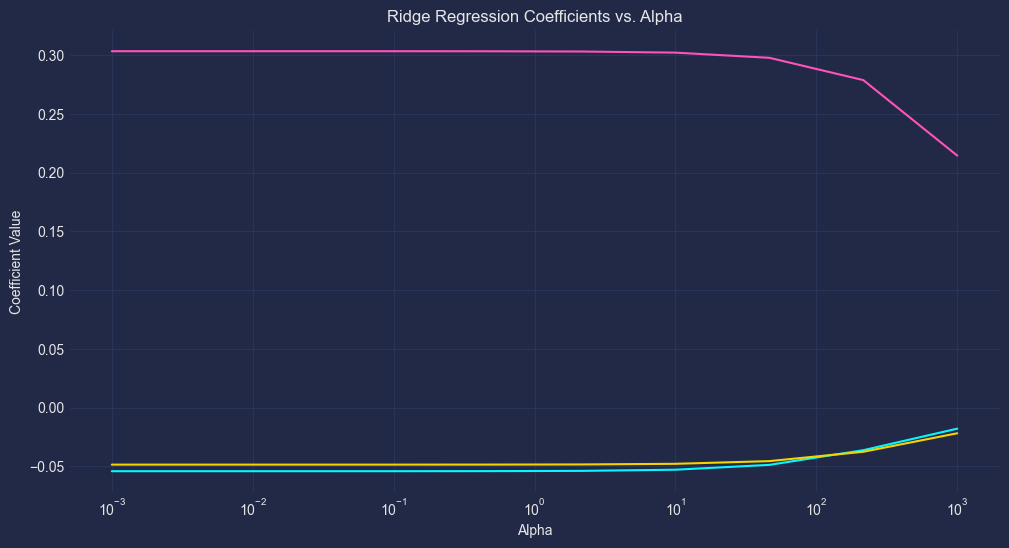

In [451]:
# Define a range of alpha values
alpha_range = np.logspace(-3, 3, num=10)  # Range from 0.001 to 1000

# Initialize an empty list to store the coefficients
coefficients = []

# Iterate over different alpha values
for alpha in alpha_range:
    # Create and fit the Ridge regression model
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    
    # Get the coefficients
    coef = ridge.coef_
    
    # Append the coefficients to the list
    coefficients.append(coef)

# Convert the coefficients list to a numpy array
coefficients = np.array(coefficients)

# Plot the coefficients against the alpha values
plt.figure(figsize=(12, 6))
for i in range(coefficients.shape[1]):
    plt.plot(alpha_range, coefficients[:, i])

plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Coefficient Value')
plt.title('Ridge Regression Coefficients vs. Alpha')
plt.legend()
plt.grid(True)
plt.show()

In [452]:
# Define the parameter grid for GridSearchCV
param_grid = {'alpha': np.logspace(-3, 3, num=10)}  # Range from 0.001 to 1000
# Create the Ridge regression model
ridge = Ridge()
# Create the GridSearchCV instance
grid_search = GridSearchCV(ridge, param_grid, scoring='neg_mean_squared_error', cv=5)
# Fit the GridSearchCV on the training data
grid_search.fit(X_train, y_train)
# Get the best Ridge model
best_ridge_model = grid_search.best_estimator_
# Make predictions on the testing set
y_pred = best_ridge_model.predict(X_test)
# Calculate root mean squared error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", rmse)
# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

Root Mean Squared Error (RMSE): 0.44274199214721977
Best Hyperparameters: {'alpha': 10.0}


## LASSO

In [455]:
from sklearn.linear_model import Lasso
X = data_scaled 
y = df3["Transported"]
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the Lasso regression model
lasso = Lasso(alpha=1.0)  # Set the alpha value
lasso.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = lasso.predict(X_test)
    
# Calculate root mean squared error (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 0.4745264870864096


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


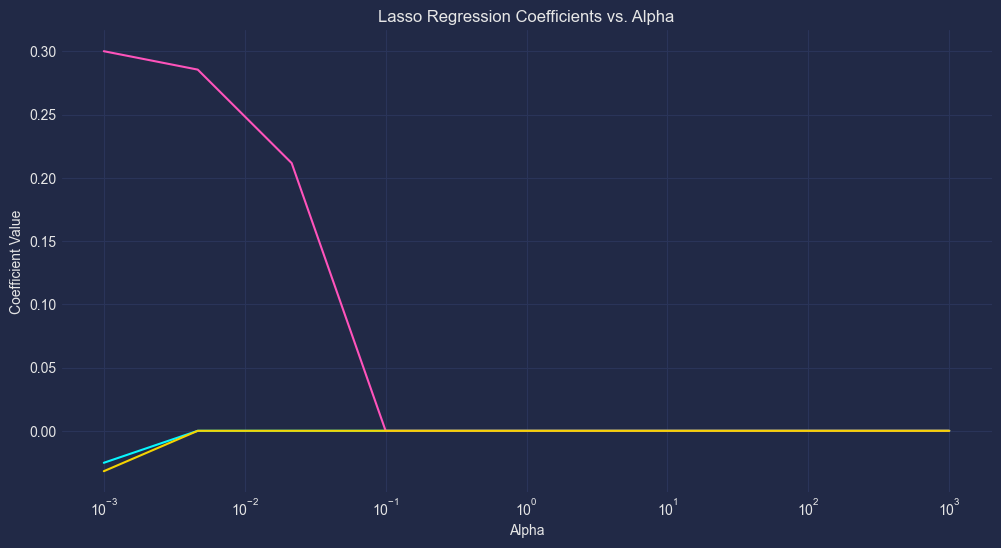

In [456]:
# Define a range of alpha values
alpha_range = np.logspace(-3, 3, num=10)  # Range from 0.001 to 1000
# Initialize an empty list to store the coefficients
coefficients = []

# Iterate over different alpha values
for alpha in alpha_range:
    # Create and fit the Ridge regression model
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)
    # Get the coefficients
    coef = lasso.coef_
    # Append the coefficients to the list
    coefficients.append(coef)
# Convert the coefficients list to a numpy array
coefficients = np.array(coefficients)
# Plot the coefficients against the alpha values
plt.figure(figsize=(12, 6))
for i in range(coefficients.shape[1]):
    plt.plot(alpha_range, coefficients[:, i])

plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Coefficient Value')
plt.title('Lasso Regression Coefficients vs. Alpha')
plt.legend()
plt.grid(True)
plt.show()

In [457]:
# Define the parameter grid for GridSearchCV
param_grid = {'alpha': np.logspace(-3, 3, num=10)}  # Range from 0.001 to 1000
# Create the GridSearchCV instance
grid_search = GridSearchCV(lasso, param_grid, scoring='neg_mean_squared_error', cv=5)
# Fit the GridSearchCV on the training data
grid_search.fit(X_train , y_train)
# Get the best Ridge model
best_ridge_model = grid_search.best_estimator_
# Make predictions on the testing set
y_pred = best_ridge_model.predict(X_test )
# Calculate root mean squared error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", rmse)
# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

Root Mean Squared Error (RMSE): 0.4431630376195729
Best Hyperparameters: {'alpha': 0.001}


## Elastic NET

In [458]:
from sklearn.linear_model import ElasticNet
X = data_scaled 
y = df3["Transported"]
# 1. Train and Evaluate the Elastic Net Model
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

elastic_net = ElasticNet(alpha=0.5, l1_ratio=0.5)  # Set alpha and l1_ratio
elastic_net.fit(X_train, y_train)

y_pred = elastic_net.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 0.4745264870864096


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


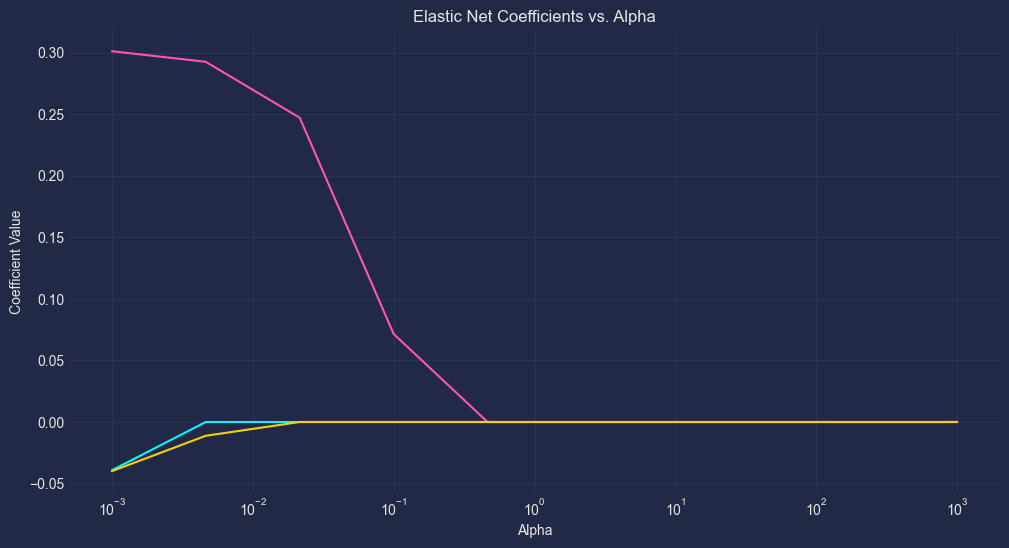

In [459]:
# Define the range of alpha values to tune
alpha_range = np.logspace(-3, 3, num=10)  # Range from 0.001 to 1000
# Initialize an empty list to store the coefficients for each alpha
coefficients = []
# Iterate over different alpha values
for alpha in alpha_range:
    # Create and fit the Elastic Net model
    elastic_net = ElasticNet(alpha=alpha, l1_ratio=0.5)
    elastic_net.fit(X_train, y_train)
    # Get the coefficients
    coef = elastic_net.coef_
    # Append the coefficients to the list
    coefficients.append(coef)
# Convert the coefficients list to a numpy array
coefficients = np.array(coefficients)
# Plot the coefficients for each feature
plt.figure(figsize=(12, 6))
for i in range(coefficients.shape[1]):
    plt.plot(alpha_range, coefficients[:, i])
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Coefficient Value')
plt.title('Elastic Net Coefficients vs. Alpha')
plt.legend()
plt.grid(True)
plt.show()